In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [2]:
train_df = pd.read_csv("asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("asl_data/sign_mnist_valid.csv")

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

num_classes = 24
y_train = keras.utils.to_categorical(y_train, 24)
y_valid = keras.utils.to_categorical(y_valid, 24)

x_train = x_train / 255
x_valid = x_valid / 255

In [3]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_valid.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
datagen = ImageDataGenerator(
    rotation_range = 10, #隨機將圖左右轉10度以內
    zoom_range= 0.1, #隨機放大縮小 10%
    width_shift_range= 0.1, #隨機左右平移總寬度的 10%
    height_shift_range= 0.1, #隨機上下平移總長度的 10%
    horizontal_flip= True, #左右翻轉，須注意左右反轉的結果可能會使原圖片意涵跑掉
    vertical_flip= False, #上下翻轉，須注意上下反轉的結果可能會使原圖片意涵跑掉
)

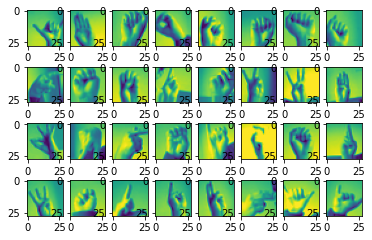

In [6]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size= batch_size)

x, y = img_iter.next() #因為 dawtagen 是一個 generator 所以可以利用 next() 依序呼叫其中的值
fig, ax = plt.subplots(nrows= 4, ncols= 8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

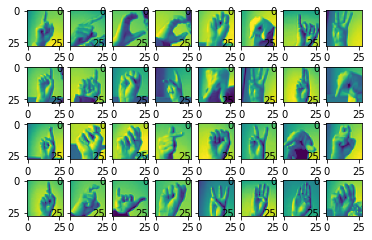

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x_train[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [8]:
model = tf.keras.models.Sequential([
           Conv2D(75, (3,3), strides= 1, padding= 'same', activation= 'relu',input_shape=(28, 28, 1)), # padding= same(零填充), valid(no padding)
           BatchNormalization(),
           MaxPool2D((2, 2), strides= 2, padding= 'same'),
           Conv2D(50, (3,3), strides= 1, padding= 'same', activation= 'relu'),
           Dropout(0.2),
           BatchNormalization(),
           MaxPool2D((2, 2), strides= 2, padding= 'same'),
           Conv2D(25, (3,3), strides= 1, padding= 'same', activation= 'relu'),
           Dropout(0.2),
           BatchNormalization(),
           MaxPool2D((2, 2), strides= 2, padding= 'same'),
           Flatten(),
           Dense(512, activation= 'relu'),
           Dropout(0.3),
           Dense(num_classes, activation= 'softmax'),
          ])

In [7]:
![feature_map_size_cal.png](attachment:feature_map_size_cal.png)
feature map and max pooling size 計算

SyntaxError: invalid syntax (<ipython-input-7-84dffe3298d6>, line 2)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [10]:
model.compile(optimizer= 'adam',loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))       # 想做幾次完成一個 epochs, Epoch = batch_size * step_per_epoch

Epoch 1/20
858/857 [==============================] - 10s 11ms/step - loss: 1.2827 - accuracy: 0.5914 - val_loss: 0.4883 - val_accuracy: 0.8313
Epoch 2/20
858/857 [==============================] - 9s 11ms/step - loss: 0.3675 - accuracy: 0.8710 - val_loss: 0.4580 - val_accuracy: 0.8532
Epoch 3/20
858/857 [==============================] - 9s 11ms/step - loss: 0.2263 - accuracy: 0.9206 - val_loss: 0.1309 - val_accuracy: 0.9527
Epoch 4/20
858/857 [==============================] - 9s 11ms/step - loss: 0.1722 - accuracy: 0.9419 - val_loss: 0.0683 - val_accuracy: 0.9782
Epoch 5/20
858/857 [==============================] - 9s 11ms/step - loss: 0.1357 - accuracy: 0.9547 - val_loss: 0.3751 - val_accuracy: 0.8756
Epoch 6/20
858/857 [==============================] - 9s 11ms/step - loss: 0.1328 - accuracy: 0.9544 - val_loss: 0.4136 - val_accuracy: 0.8858
Epoch 7/20
858/857 [==============================] - 9s 11ms/step - loss: 0.1128 - accuracy: 0.9631 - val_loss: 0.4593 - val_accuracy: 0.864

In [22]:
tf.saved_model.save(model, "model")

INFO:tensorflow:Assets written to: model/assets


In [23]:
model.save('asl.model2')

INFO:tensorflow:Assets written to: asl.model2/assets


In [28]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

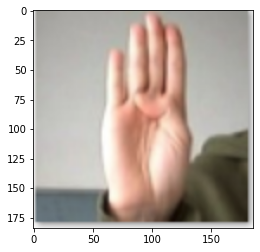

In [29]:
show_image('asl_images/b.png')

In [32]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode= 'grayscale', target_size= (28, 28))
    return image

In [41]:
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [43]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

'b'

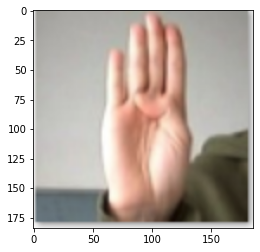

In [44]:
predict_letter("asl_images/b.png")

'a'

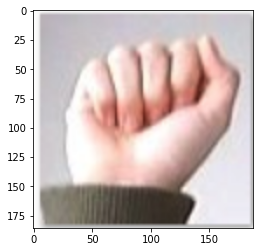

In [45]:
predict_letter("asl_images/a.png")